# Time Series Analysis

In this exercise we'll attempt to predict Bitcoin prices with Python.

How to approach time series data manipulation and how you can use it in your everyday work. 

The BTC price movements from January to March of 2015 will be used, a time in which bitcoin largely went sideways. The price data will be pulled from Coinbase.



In [3]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['axes.grid'] = True

In [4]:
# Data from Kaggle.
df = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv', index_col=0, )

/usr/local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


In [10]:
df.index = [datetime.utcfromtimestamp(x) for x in df.index]

In [14]:
df.iloc[[1, -1], :]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.70932,28909.166061


## See the last 10 rows of the data.

In [15]:
# Weighted_Price is the Volume Weighted Average Price.
df.tail(10)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2020-12-30 23:51:00,28836.97,28849.67,28807.78,28826.52,2.051917,59173.965272,28838.376450
2020-12-30 23:52:00,28826.49,28844.25,28816.09,28816.09,0.721410,20803.457100,28837.207539
2020-12-30 23:53:00,28814.36,28822.71,28800.00,28800.00,1.529671,44076.572351,28814.411945
2020-12-30 23:54:00,28800.00,28832.79,28800.00,28831.35,2.036450,58675.679644,28812.732950
2020-12-30 23:55:00,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


## Let's visualize each of the columns.

<AxesSubplot:>

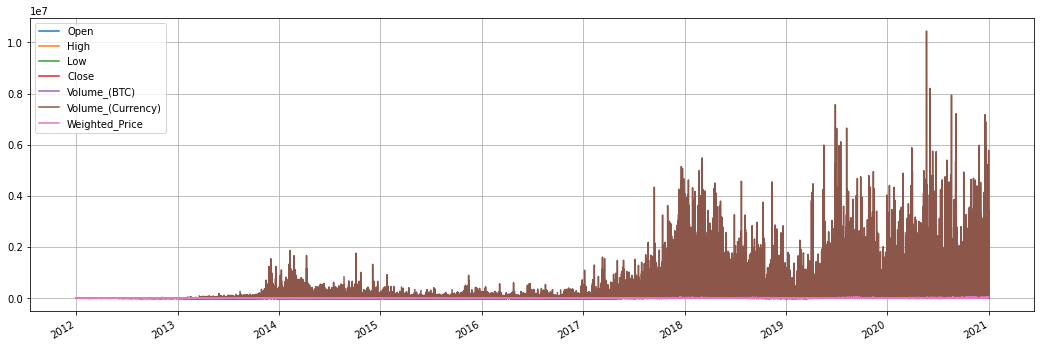

In [16]:
# Plot the Open, High, Low, Close and Volume in a chart.
df.plot()

Notice how long it takes to do that... Do you need to see every single minute plotted on the graph?

## How many data samples do we have?

In [18]:
df.shape

(4727777, 7)

In [19]:
# Resample to daily bars and plot again.

In [38]:
df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


In [57]:
aggregated_df = df.resample('1D').agg({'Open': 'first', 
                       'High': 'max',
                       'Low': 'min',
                       'Close': 'last',
                       'Volume_(Currency)': 'sum'
                      })

Text(0.5, 1.0, 'BTC Through Time')

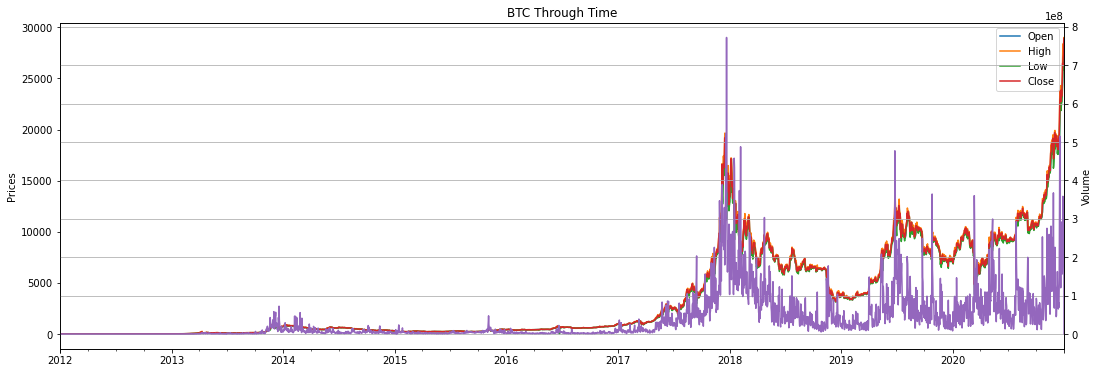

In [58]:
aggregated_df.drop('Volume_(Currency)', axis=1).plot();
plt.ylabel("Prices")
aggregated_df['Volume_(Currency)'].plot(secondary_y=True);
plt.ylabel("Volume");
plt.title("BTC Through Time")

In [61]:
df.dropna().head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## What is the format of the dates in the data? From what date to what date and at what granularity?

Minute by minute.
From 2011 to 2020.

## How many NaNs do we have? Are they at specific hours? Why are they NaNs?

<AxesSubplot:>

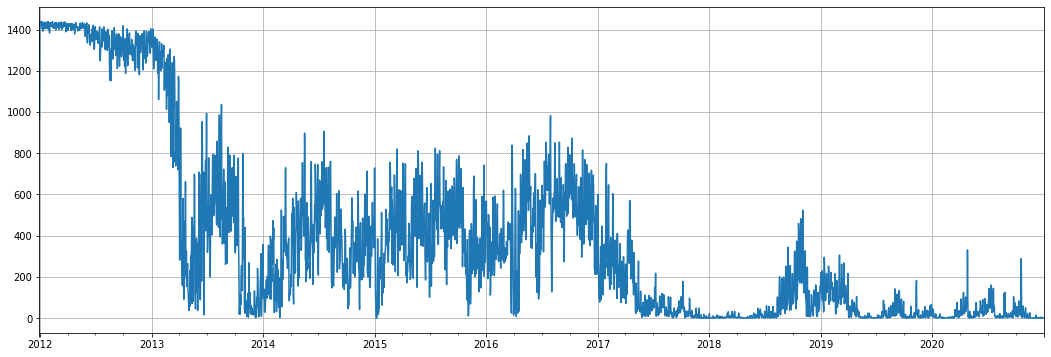

In [68]:
df['Open'].isna().resample('1D').sum().plot()

In [71]:
nans = df['Open'].isna().resample('1H').sum()

In [75]:
nans.index = nans.index.hour

<AxesSubplot:>

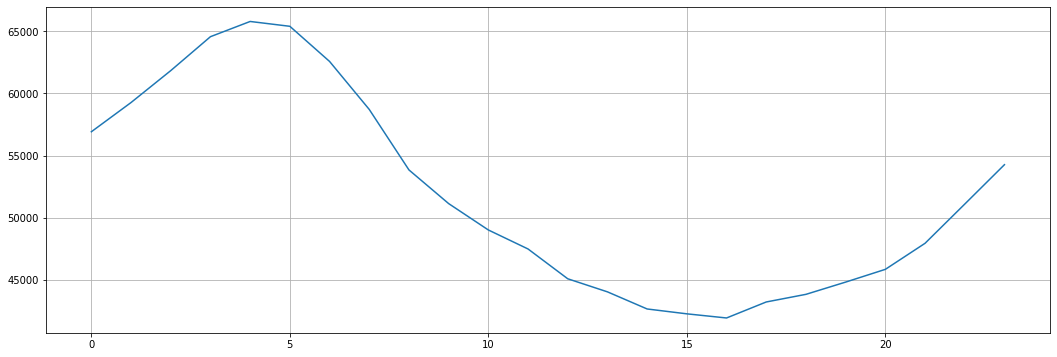

In [78]:
nans.groupby(nans.index).sum().plot()

## Let's see what happened in 2017...

In [79]:
# Print the first 20 rows

In [86]:
df.loc['2017-01-07':'2017-05-07']

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2017-01-07 00:00:00,894.02,895.50,894.02,895.50,0.363000,324.548500,894.073003
2017-01-07 00:01:00,895.50,895.95,894.06,895.88,0.476591,426.613245,895.134917
2017-01-07 00:02:00,892.52,892.78,892.00,892.00,50.350000,44918.526467,892.125650
2017-01-07 00:03:00,892.00,892.00,891.57,891.64,0.700000,624.139582,891.627974
2017-01-07 00:04:00,891.67,894.56,891.56,894.38,26.982171,24059.920693,891.696984
...,...,...,...,...,...,...,...
2017-05-07 23:55:00,1555.87,1555.87,1555.87,1555.87,0.323525,503.362748,1555.870000
2017-05-07 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-07 23:57:00,1554.20,1555.19,1553.04,1554.38,2.469762,3836.421036,1553.356478
2017-05-07 23:58:00,1553.05,1554.38,1553.04,1554.38,2.372877,3687.853958,1554.170186


In [88]:
df.dropna().between_time('9:00', '15:30')

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2012-01-01 15:28:00,4.84,4.84,4.84,4.84,10.000000,48.400000,4.840000
2012-01-03 11:45:00,5.32,5.32,5.32,5.32,2.419173,12.870000,5.320000
2012-01-03 14:22:00,5.14,5.14,5.14,5.14,0.680000,3.495200,5.140000
2012-01-03 14:54:00,5.26,5.26,5.26,5.26,29.319392,154.220000,5.260000
2012-01-04 12:41:00,5.19,5.19,5.19,5.19,2.641619,13.710000,5.190000
...,...,...,...,...,...,...,...
2020-12-30 15:26:00,28167.41,28178.21,28152.93,28164.30,1.295089,36481.982278,28169.489573
2020-12-30 15:27:00,28177.24,28177.24,28157.00,28165.85,0.749515,21114.178591,28170.459901
2020-12-30 15:28:00,28165.85,28170.68,28139.81,28139.81,4.008929,112862.069030,28152.672398
2020-12-30 15:29:00,28153.52,28160.55,28145.92,28153.75,1.537446,43289.042692,28156.462366


## We need to fill in the missing data, or can we get rid of it?

In [89]:
## This is an art as much as it is a science....
# Fill the data accordingly, column by column.

In [93]:
df2 = df['2017']

In [98]:
df2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000,7353.847400,966.340000
2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,7814.876061,966.305479
2017-01-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2['Open'] = df2['Open'].ffill()
df2['High'] = df2['High'].ffill()
df2['Low'] = df2['Low'].ffill()
df2['Close'] = df2['Close'].ffill()
df2['Volume_(BTC)'] = df2['Volume_(BTC)'].fillna(0)
df2['Volume_(Currency)'] = df2['Volume_(Currency)'].fillna(0)
df2['Weighted_Price'] = df2['Weighted_Price'].fillna(0)

In [107]:
df2.dropna(inplace=True)

<ipython-input-107-f66736151044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [108]:
df2

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2017-01-01 00:01:00,966.34,966.34,966.34,966.34,7.610000,7353.847400,966.340000
2017-01-01 00:02:00,966.16,966.37,966.16,966.37,8.087376,7814.876061,966.305479
2017-01-01 00:03:00,966.16,966.37,966.16,966.37,0.000000,0.000000,0.000000
2017-01-01 00:04:00,966.16,966.37,966.16,966.37,0.000000,0.000000,0.000000
2017-01-01 00:05:00,966.43,966.43,966.43,966.43,0.107000,103.408010,966.430000
...,...,...,...,...,...,...,...
2017-12-31 23:55:00,13825.05,13825.05,13825.05,13825.05,0.065501,905.560130,13825.050000
2017-12-31 23:56:00,13827.00,13908.69,13827.00,13859.58,0.666459,9218.975090,13832.772582
2017-12-31 23:57:00,13908.73,13913.26,13874.99,13913.26,0.775012,10755.452004,13877.786629
2017-12-31 23:58:00,13913.26,13953.83,13884.69,13953.77,1.398784,19471.259902,13920.133815


# Let's take daily closes as our data from now on...

In [ ]:
# Take the daily close of the data and plot it.

In [119]:
np.log(1+df[['Open', 'High', 'Low', 'Close']].diff()).corr()

<ipython-input-119-1d2765ff4d51>:1: RuntimeWarning: divide by zero encountered in log
  np.log(1+df[['Open', 'High', 'Low', 'Close']].diff()).corr()
<ipython-input-119-1d2765ff4d51>:1: RuntimeWarning: invalid value encountered in log
  np.log(1+df[['Open', 'High', 'Low', 'Close']].diff()).corr()


,Open,High,Low,Close
Open,1.000000,0.547191,0.676911,0.484151
High,0.547191,1.000000,0.511077,0.685828
Low,0.676911,0.511077,1.000000,0.584377
Close,0.484151,0.685828,0.584377,1.000000


In [ ]:
# We want to see the data in percent change so that it's comparable across the board.

# We can also use log-returns, up to you.
# For a better understanding of log-returns in finance, read this: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

# Why would we not use absolute returns?

In [ ]:
## Plot the daily distribution of percent returns as a density plot using sns.distplot

In [ ]:
## The data is rather noisy. Why don't we take a moving average to smooth it out.

In [ ]:
## The problem with a moving average is that it weighs the last value as much as the newest value.
# For this, we'll use an exponentially weighted moving average, which you can find here: https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.ewma.html

In [ ]:
## Now let's visualize our moving averages compared to the actual closing prices.

In [ ]:
## Let's see what our rolling standard deviation is over time.

In [ ]:
## Now, we want to compare the moves today with the historical moves of the underlying (bitcoin, in this case).
## What can we apply to the data in order to do this?
# HINT: z-score

In [ ]:
## Now let's make a simple trading strategy!
# We have two options: either we are trend-following or mean reverting.
# Trend following means that if it's going up, we buy because it will continue going up.
# Mean reversion means that if it goes down, it is bound to come back up.
# This is also where a lot of domain knowledge comes into play.

In [ ]:
df['Close'].resample('1D').last().plot()
plt.grid()